# Caifornia Housing Project

Data sourced from [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices)  
Original source of data: US 1990 Census

### Setup

In [39]:
import pandas as pd
import numpy as np
import sklearn
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
%matplotlib inline

In [6]:
# Reading in the data
data = pd.read_csv('housing.csv')
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

### Exploratory Data Analysis (EDA)

In [7]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Figure size 1440x1080 with 0 Axes>

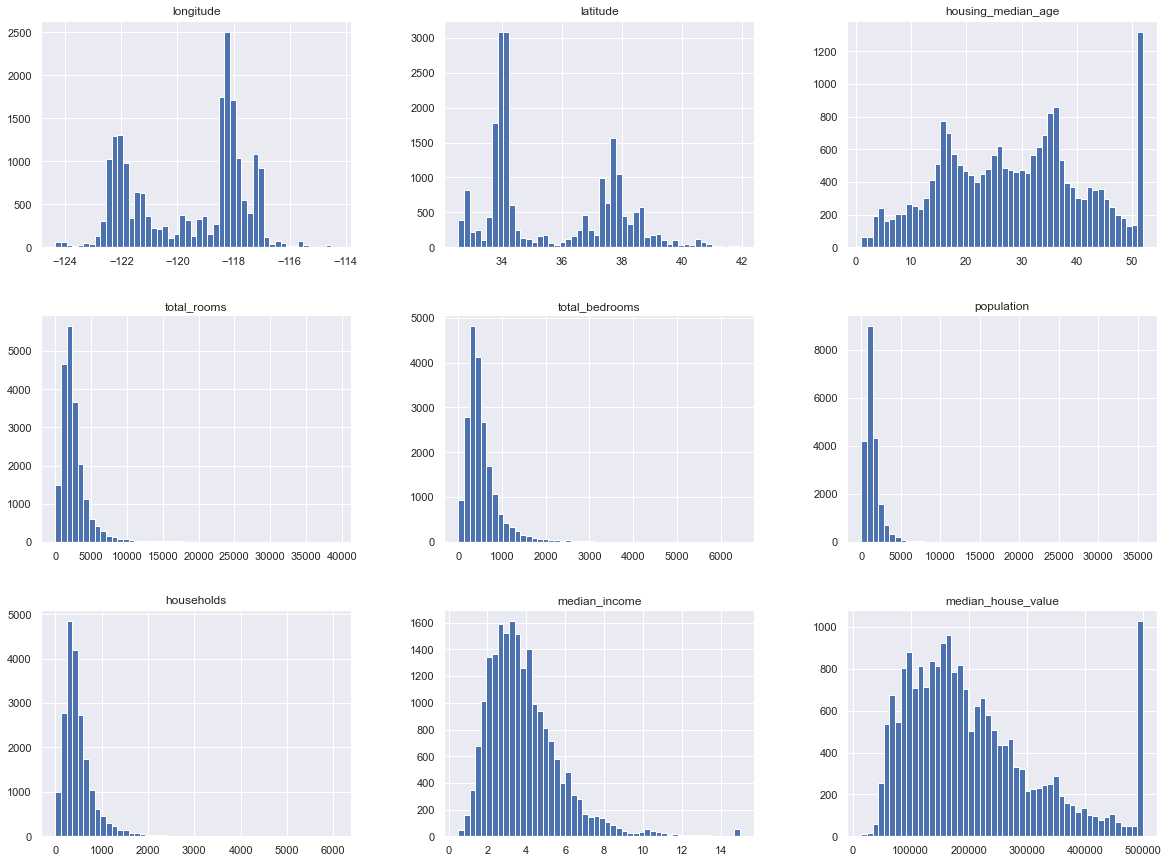

In [28]:
# sns.displot(data = data, x = 'total_rooms', kde = True)
data.hist(bins = 50, figsize = (20,15));
plt.show()

<AxesSubplot:>

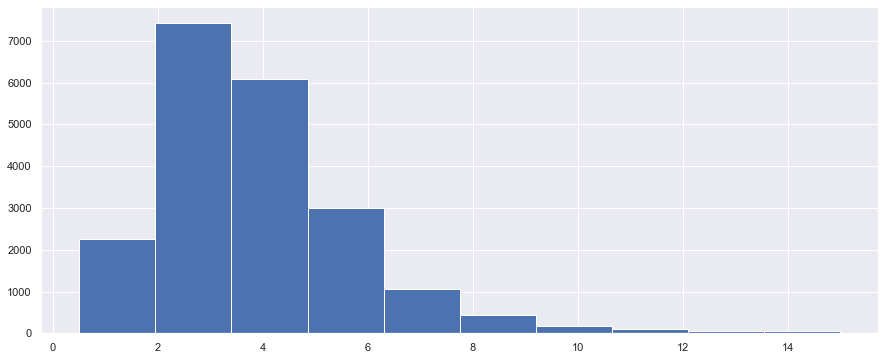

In [35]:
# Binning median income
plt.figure(figsize = (15,6))
data['median_income'].hist()

In [37]:
data['income_category'] = pd.cut(data['median_income'],
                                bins = [0, 1.5, 3, 4.5, 6, np.inf],
                                labels = [1, 2, 3, 4, 5])

In [38]:
data['income_category'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

### Splitting into train and test datasets

In [40]:
# Setting seed 
np.random.seed(2)

In [52]:
train_set, test_set = train_test_split(data, test_size = 0.2)

In [54]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15580    -116.86     33.02                17.0        401.0            68.0   
1754     -122.32     37.94                38.0       2751.0           522.0   
20562    -121.77     38.67                45.0       2438.0           462.0   
20093    -120.12     38.12                37.0       3355.0           666.0   
6437     -118.02     34.10                36.0       1928.0           361.0   
...          ...       ...                 ...          ...             ...   
17201    -119.78     34.45                23.0       2077.0           306.0   
427      -122.27     37.88                44.0       2252.0           592.0   
57       -122.28     37.82                52.0       1489.0           335.0   
1812     -122.32     37.91                34.0       2669.0           647.0   
4978     -118.29     34.00                41.0       1807.0           493.0   

       population  households  median_income  median_house_value  \
15580       251.0        69.0         4.6518            170200.0   
1754       1390.0       489.0         3.7277            165100.0   
20562      1415.0       510.0         2.8351            107200.0   
20093       338.0       136.0         2.0625             88900.0   
6437       1008.0       368.0         4.7330            233700.0   
...           ...         ...            ...                 ...   
17201       705.0       256.0         6.4744            500001.0   
427         989.0       550.0         3.0132            272900.0   
57          728.0       244.0         0.8172             85300.0   
1812       1341.0       555.0         2.6399            119600.0   
4978       1731.0       471.0         1.2347            111700.0   

      ocean_proximity income_category  
15580       <1H OCEAN               4  
1754         NEAR BAY               3  
20562          INLAND               2  
20093          INLAND               2  
6437           INLAND               4  
...               ...             ...  
17201      NEAR OCEAN               5  
427          NEAR BAY               3  
57           NEAR BAY               1  
1812         NEAR BAY               2  
4978        <1H OCEAN               1  

[16512 rows x 11 columns]

In [49]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

for train_index, test_index in split.split(data, data['income_category']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [55]:
strat_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
11689    -117.99     33.87                16.0       1689.0           499.0   
14008    -117.19     32.75                52.0       1495.0           230.0   
4173     -118.23     34.10                46.0       2483.0           587.0   
17257    -119.70     34.41                52.0       1526.0           458.0   
2434     -119.62     36.58                13.0       1788.0           405.0   
...          ...       ...                 ...          ...             ...   
5240     -118.24     33.93                32.0       1063.0           282.0   
19210    -122.71     38.46                41.0       1974.0           482.0   
7774     -118.08     33.91                30.0       1366.0           460.0   
7298     -118.21     33.98                35.0       1705.0           562.0   
498      -122.27     37.85                47.0       2077.0           400.0   

       population  households  median_income  median_house_value  \
11689      1260.0       453.0         3.1205            174000.0   
14008       459.0       190.0         8.1548            500001.0   
4173       2121.0       553.0         2.2788            152900.0   
17257      1633.0       449.0         2.2069            226500.0   
2434       1652.0       411.0         2.6858             62400.0   
...           ...         ...            ...                 ...   
5240        992.0       253.0         0.8984             88700.0   
19210       965.0       458.0         2.9050            159300.0   
7774        920.0       410.0         0.9946            159900.0   
7298       2212.0       539.0         2.3250            161500.0   
498         719.0       326.0         2.2431            172700.0   

      ocean_proximity income_category  
11689       <1H OCEAN               3  
14008      NEAR OCEAN               5  
4173        <1H OCEAN               2  
17257      NEAR OCEAN               2  
2434           INLAND               2  
...               ...             ...  
5240        <1H OCEAN               1  
19210       <1H OCEAN               2  
7774        <1H OCEAN               1  
7298        <1H OCEAN               2  
498          NEAR BAY               2  

[16512 rows x 11 columns]

#### Checking that stratified split worked as intended

In [47]:
data['income_category'].value_counts()/len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

In [51]:
strat_train_set['income_category'].value_counts()/len(train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_category, dtype: float64

In [56]:
def income_proportions(dataset):
    return dataset['income_category'].value_counts()/len(dataset)

In [62]:
comparison_df = pd.DataFrame({
    'Overall':income_proportions(data),
    'Random':income_proportions(test_set),
    'Stratified':income_proportions(strat_test_set)
}).sort_index()

comparison_df['Random % Error'] = 100 * comparison_df['Random']/comparison_df['Overall'] - 100
comparison_df['Stratified % Error'] = 100 * comparison_df['Stratified']/comparison_df['Overall'] - 100

In [61]:
comparison_df

Overall    Random  Stratified  Random % Error  Stratified % Error
1  0.039826  0.030766    0.039971      -22.749392            0.364964
2  0.318847  0.327277    0.318798        2.643975           -0.015195
3  0.350581  0.351260    0.350533        0.193477           -0.013820
4  0.176308  0.179021    0.176357        1.538884            0.027480
5  0.114438  0.111676    0.114341       -2.413209           -0.084674

### Visualizing data

In [64]:
# Creating a copy of the stratified training set to use 
housing = strat_train_set.copy()

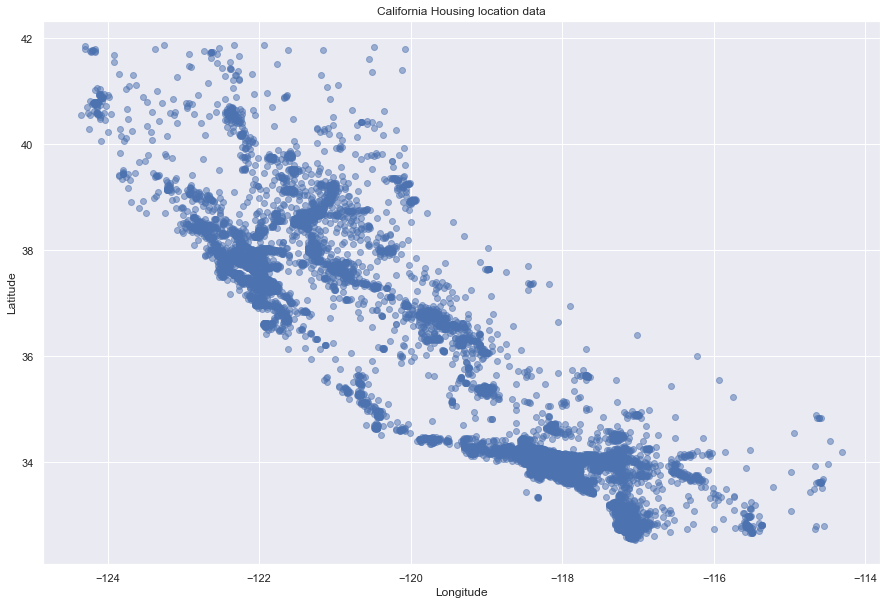

In [90]:
plt.figure(figsize = [15,10])
plt.scatter(x = housing.longitude, y = housing.latitude, alpha = 0.5)
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.title('California Housing location data');

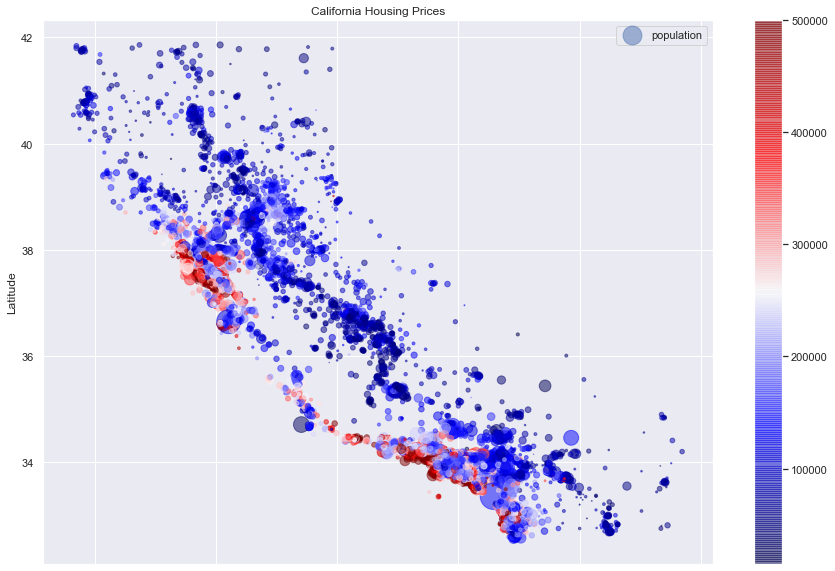

In [106]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.5,
           c = housing.median_house_value, cmap = 'seismic', colorbar = True, 
             s = housing['population']/50, label = 'population',
             figsize = [15,10])
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.title('California Housing Prices');
plt.show()